# Python - General Introduction

##### How to open .h5 files  in Python (Jupyter Notebook) and what you can do with each variable




Useful link with tutorial:

https://lumicks-pylake.readthedocs.io/en/latest/install.html

## Find all the files in the folder 

In [21]:
"""  Install Pylake, in case it's not installed """
# !pip install lumicks.pylake

"  Install Pylake, in case it's not installed "

In [22]:
""" Load libraries so that you can analyze the exported data """

import lumicks.pylake as pylake # package that LUMICKS provides
import numpy as np # standard python toolkit for more elaborate mathematical operations
import matplotlib.pyplot as plt # plotting library


In [23]:
""" Load one file """
filename = r'20181121-174038 Marker Single tether.h5'
f = pylake.File(filename)

In [24]:
""" Load list of all files in folder """
import glob
# select the folder, here we search for .h5 files in the Data folder
files = glob.glob('*.h5')
print("found {} files in folder".format(len(files)))

for file in files:
    print(file)
    f = pylake.File(file)
    # do the operation on each file here

found 1 files in folder
20181121-174038 Marker Single tether.h5


## List a content of a file

In [25]:
"""View the structure of a loaded file"""

filename = '20181121-174038 Marker Single tether.h5'
f = pylake.File(filename)
print(f)

File root metadata:
- Bluelake version: 1.5.0-fix-timeout.1
- Description: 
- Experiment: 
- GUID: {45D771E7-E9BA-4255-B4A2-AE00B8F1715E}
- Export time (ns): 1542818438986002600
- File format version: 1

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 172
Calibration:
  120:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 0
  Excitation Laser Green:
  - Data 

There are two types of variables in these files in general:

1, Time-traces, e.g. force, distance recordings, confocal recordings, photon count

2, Events, e.g. trap calibration, zeroing the force


## Time-traces / Channels

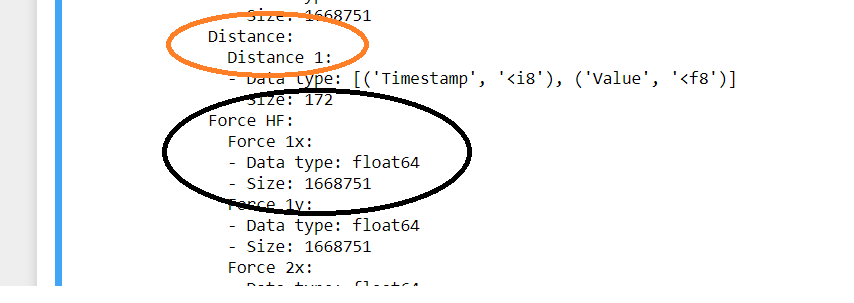

- "f" is the file that you previously selected
- the first bracket is the type of variable you're interested in. These are the leftmost items in the list (e.g. Distance or Force)
- the second bracket is the secondary item in that list. E.g. "Force 1x" is located inside "Force HF"

So a sample code would be like this:
"f["Force HF"]["Force 1x"]"

In [26]:
force1x = f["Force HF"]["Force 1x"]

# or

distance = f['Distance']['Distance 1']

#### Then you can use different commands on these files:

- .plot() to plot these items

- ['0s':'10s'] to slice them

- .sample_rate to obtain the sampling rate of this variable

- .downsampled_by(100) to downsample the file

- .data to obtain the raw data from these files

- .timestamps to obtain the time data ponts from this data (note that time is in nanoseconds)




###### AND you can also combine these commands

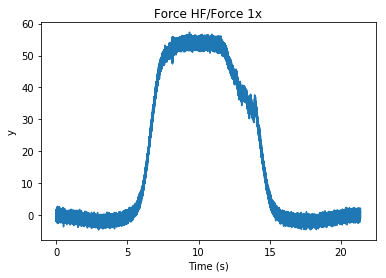

In [27]:
""" Plot the different measured parameters, e.g. force """
plt.figure()

force1x.plot()

plt.savefig("../docs/load_files/python_fig1.png")

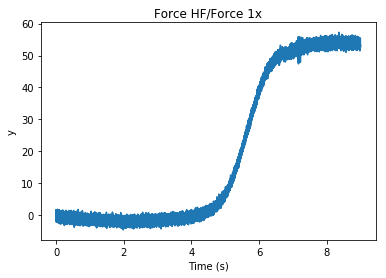

In [28]:
""" Slice them to look at only a certain section of the data """

force1x['1s':'10s'].plot()

plt.savefig("../docs/load_files/python_fig2.png")

In [29]:
""" You can get the sampling rate in Hz """

sampling_rate = force1x.sample_rate
print(sampling_rate)

78125


In [30]:
""" You can downsample the force to a certain sampling frequency """

final_sampling_rate = 100 #Hz
force1x_100Hz = force1x.downsampled_by(int( sampling_rate / final_sampling_rate ))


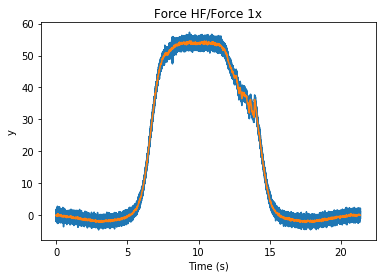

In [31]:
""" Now we can plot the downsampled force ! """

force1x.plot()
force1x_100Hz.plot()

plt.savefig("../docs/load_files/python_fig3.png")

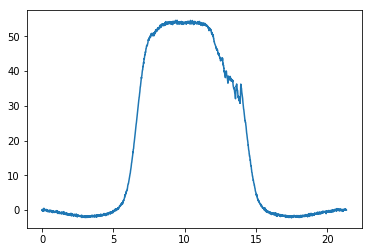

In [32]:
""" We can also get the RAW data out and plot them ourselves """

force_data = force1x_100Hz.data
force_time = force1x_100Hz.timestamps

""" Please NOTE that the time data are in NANOSECONDS

    We can convert them to seconds in this way, you subtract the first (zeroth) value, then divide by 1e9 (ten to the power of nine)
""" 

force_time = (force_time - force_time[0]) * 1e-9

# plot them
plt.plot(force_time, force_data)

plt.savefig("../docs/load_files/python_fig4.png")

### Plot Force-Distance curve

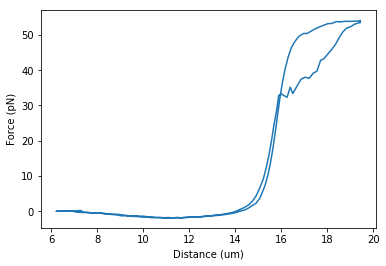

In [37]:
""" We can make the same plot as before with the obtained data """

force_data = f["Force LF"]["Force 1x"].data
distance_data = f["Distance"]["Distance 1"].data

plt.plot(distance_data, force_data)

"""Now you have to label the axis yourselves"""

plt.xlabel("Distance (um)")
plt.ylabel("Force (pN)")

plt.savefig("../docs/load_files/python_fig5.png")

## Events (e.g. calibration)

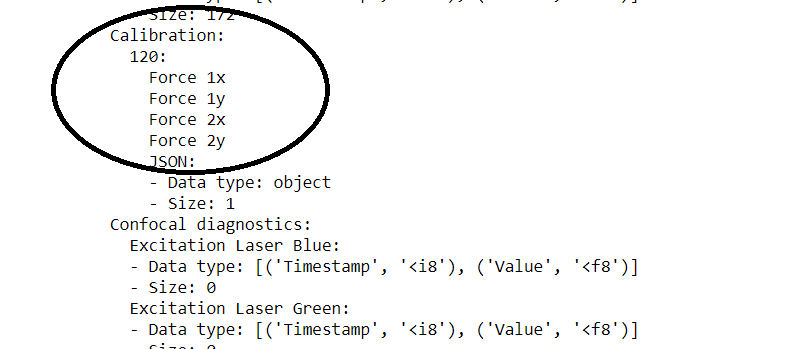

In terms of calibration events, we have 1 in the dataset that is named "123"

In [34]:
params = f["Calibration"]["120"]["Force 1x"]

#### We can also apply certain functions to these files

- .h5.attrs.items() get a list of what was recorded during this event

- .attrs.get() we can obtain one of the parameters


In [35]:
""" Print the list of calibration paramenters """

list(params.h5.attrs.items())

[('Kind', 'Reset offset to zero'),
 ('Offset (pN)', -83.95937128462808),
 ('Response (pN/V)', 817.3620512725377),
 ('Sign', 1.0),
 ('Start time (ns)', 1542807812426015400),
 ('Stop time (ns)', 1542807822426015400),
 ('Bead diameter (um)', 4.4),
 ('Fit range (max.) (Hz)', 23000.0),
 ('Fit range (min.) (Hz)', 10.0),
 ('Fit tolerance', 1e-07),
 ('Max iterations', 10000.0),
 ('Number of samples', 781250.0),
 ('Points per block', 2000.0),
 ('Sample rate (Hz)', 78125.0),
 ('Temperature (C)', 20.0),
 ('Viscosity (Pa*s)', 0.001002),
 ('D (V^2/s)', 0.0013035237229152086),
 ('Rd (um/V)', 8.644328902663627),
 ('Rf (pN/V)', 817.3620512725377),
 ('alpha', 0.6348574679502846),
 ('backing (%)', 100.0),
 ('chi_squared_per_deg', 3.437949600748519),
 ('err_D', 9.46357965045672e-06),
 ('err_alpha', 0.0026906380810170494),
 ('err_f_diode', 143.89781216952397),
 ('err_fc', 4.065413448229771),
 ('f_diode (Hz)', 7140.409949534314),
 ('fc (Hz)', 362.1694334888449),
 ('kappa (pN/nm)', 0.09455471448115298),
 ('

In [36]:
""" interested in stiffness for example """

stiffness = params.h5.attrs.get("kappa (pN/nm)")
print(stiffness)

0.09455471448115298
